In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\market classification project using TCN on interaday Gold data\\data with rsi.csv")
print(df.head())

   Unnamed: 0.1  Unnamed: 0            date     open     high      low  \
0             0           0  4/22/2025 3:00  3471.10  3475.10  3466.80   
1             1           1  4/22/2025 4:00  3472.57  3494.08  3472.28   
2             2           2  4/22/2025 5:00  3487.55  3487.94  3479.20   
3             3           3  4/22/2025 6:00  3484.95  3495.01  3474.14   
4             4           4  4/22/2025 7:00  3492.59  3499.45  3477.36   

     close  volume  past_ret_1h  past_ret_2h  past_ret_4h  past_ret_8h  \
0  3475.10      36    -0.046091    -0.046091    -0.044914    -0.046364   
1  3487.27     151    -0.003490    -0.049420    -0.048861    -0.055992   
2  3484.67     156     0.000746    -0.002746    -0.048710    -0.054005   
3  3493.26     152    -0.002459    -0.001715    -0.051050    -0.050652   
4  3479.42     149     0.003978     0.001509    -0.001242    -0.046100   

   past_ret_16h forward regime  probability  0.6 percent prediction  \
0     -0.042051          range         

In [3]:
features = [
    "date", "open", "high", "low", "close", "volume",
    "past_ret_1h", "past_ret_2h", "past_ret_4h", "past_ret_8h", "past_ret_16h",
    "probability", "0.6 percent prediction", "1 percent prediction",
    "1.5 percent prediction", "RSI_16"
]

In [4]:
df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].map(pd.Timestamp.toordinal)

In [5]:
mapping = {"range":0, "upward":1, "downward":-1}
df["forward regime"] = df["forward regime"].map(mapping)

X = df[features]
y = df["forward regime"]

In [6]:
# replaced weights
class_weights = {
    0: 1.51,
    1: 5.33,
    -1: 6.62 
}

In [7]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df = df.dropna()

print("remainig nans:", df.isna().sum().sum())

remainig nans: 0


C:\Users\user\AppData\Local\Temp\ipykernel_50000\1138463024.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_50000\1138463024.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [8]:
print(df[features].isna().sum())


date                      0
open                      0
high                      0
low                       0
close                     0
volume                    0
past_ret_1h               0
past_ret_2h               0
past_ret_4h               0
past_ret_8h               0
past_ret_16h              0
probability               0
0.6 percent prediction    0
1 percent prediction      0
1.5 percent prediction    0
RSI_16                    0
dtype: int64


In [9]:
print(df)

      Unnamed: 0.1  Unnamed: 0    date     open     high      low    close  \
0                0           0  739363  3471.10  3475.10  3466.80  3475.10   
1                1           1  739363  3472.57  3494.08  3472.28  3487.27   
2                2           2  739363  3487.55  3487.94  3479.20  3484.67   
3                3           3  739363  3484.95  3495.01  3474.14  3493.26   
4                4           4  739363  3492.59  3499.45  3477.36  3479.42   
...            ...         ...     ...      ...      ...      ...      ...   
2937          2937        2937  739534  3995.56  3999.84  3990.61  3993.68   
2938          2938        2938  739534  3993.50  3999.70  3983.56  3986.96   
2939          2939        2939  739534  3987.35  3993.31  3980.01  3985.40   
2940          2940        2940  739534  3985.33  3997.99  3975.26  3978.33   
2941          2941        2941  739534  3978.64  3993.93  3970.39  3989.12   

      volume  past_ret_1h  past_ret_2h  past_ret_4h  past_ret_8

In [14]:
df.to_csv('C:\\Users\\user\\Downloads\\market classification project using TCN on interaday Gold data\\new data without nan.csv', index=False)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    shuffle=True,
    stratify=y,
    random_state=42
)

print("train dist:\n", y_train.value_counts())
print("\ntest dist:\n", y_test.value_counts())

train dist:
 forward regime
 0    1556
 1     441
-1     356
Name: count, dtype: int64

test dist:
 forward regime
 0    390
 1    110
-1     89
Name: count, dtype: int64


In [17]:
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline

In [18]:
smote = SMOTE(random_state=42)

model  = LogisticRegression(
    multi_class="ovr",
    max_iter=500,
    class_weight=class_weights
)

pipe = ImPipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("smote", smote),
    ("clf", model)
])

pipe.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight={-1: 6.62, 0: 1.51, 1: 5.33},
                                    max_iter=500, multi_class='ovr'))])

In [19]:
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())


NaNs in X_train: 3293
NaNs in X_test: 812


In [20]:
for col in X_train.columns:
    print(col, X_train[col].dtype, X_train[col].isna().sum())


date int64 0
open float64 0
high float64 0
low float64 0
close float64 0
volume int64 0
past_ret_1h float64 0
past_ret_2h float64 0
past_ret_4h float64 0
past_ret_8h float64 0
past_ret_16h float64 0
probability float64 751
0.6 percent prediction float64 843
1 percent prediction float64 843
1.5 percent prediction float64 843
RSI_16 float64 13


In [26]:
X = X.apply(pd.to_numeric, errors="coerce")


In [27]:
X = X.fillna(X.median())


In [28]:
smote = SMOTE(random_state=42)

model  = LogisticRegression(
    multi_class="ovr",
    max_iter=500,
    class_weight=class_weights
)

pipe = ImPipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("smote", smote),
    ("clf", model)
])

pipe.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(class_weight={-1: 6.62, 0: 1.51, 1: 5.33},
                                    max_iter=500, multi_class='ovr'))])

In [29]:
y_pred = pipe.predict(X_test)

print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))



--- Classification Report ---

              precision    recall  f1-score   support

          -1       0.20      0.73      0.31        89
           0       0.50      0.00      0.01       390
           1       0.15      0.35      0.21       110

    accuracy                           0.18       589
   macro avg       0.28      0.36      0.17       589
weighted avg       0.39      0.18      0.09       589



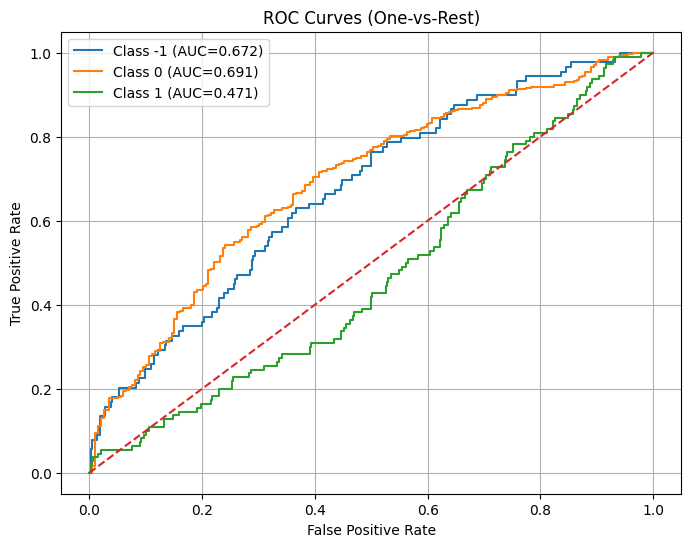

In [22]:
# Get decision function for ROC
y_score = pipe.decision_function(X_test)

classes = sorted(y.unique())

plt.figure(figsize=(8,6))
for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve((y_test == c).astype(int), y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {c} (AUC={roc_auc:.3f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


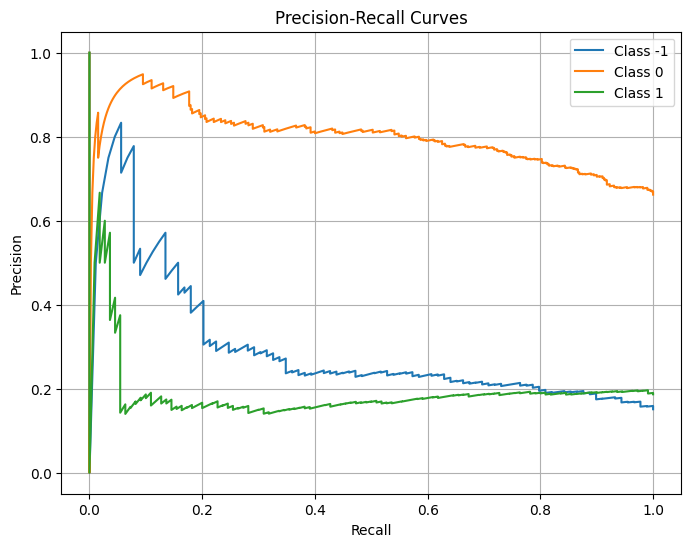

In [24]:
plt.figure(figsize=(8,6))
for i, c in enumerate(classes):
    precision, recall, _ = precision_recall_curve((y_test == c).astype(int), y_score[:, i])
    plt.plot(recall, precision, label=f"Class {c}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.show()


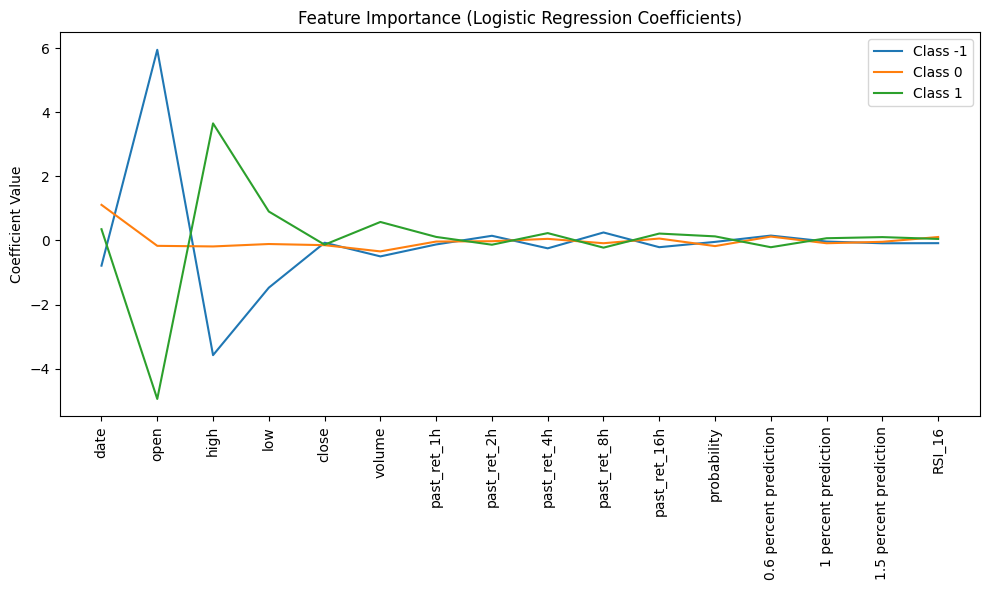

In [25]:
coefs = pipe.named_steps["clf"].coef_

plt.figure(figsize=(10,6))
for i, c in enumerate(classes):
    plt.plot(coefs[i], label=f"Class {c}")

plt.xticks(range(len(features)), features, rotation=90)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.legend()
plt.tight_layout()
plt.show()
